## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.special import expit
from sklearn.metrics import confusion_matrix
from sklearn import svm
import datetime


## Importing the data, null ,describe and conversion of datatypes

In [2]:
os.chdir('C:/Users/soumya/Desktop/BI/Soumya - Projects')
df = pd.read_csv('Fraud Detection.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76529 entries, 0 to 76528
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_number        76529 non-null  int64  
 1   user_id                   76529 non-null  int64  
 2   payment_method            76529 non-null  object 
 3   partner_id                76529 non-null  int64  
 4   partner_category          76529 non-null  object 
 5   country                   76529 non-null  object 
 6   device_type               76529 non-null  object 
 7   money_transacted          76529 non-null  float64
 8   transaction_initiation    76529 non-null  object 
 9   partner_pricing_category  76529 non-null  int64  
 10  is_fraud                  76529 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 6.4+ MB
None


In [3]:
print(df.isna().sum())

transaction_number          0
user_id                     0
payment_method              0
partner_id                  0
partner_category            0
country                     0
device_type                 0
money_transacted            0
transaction_initiation      0
partner_pricing_category    0
is_fraud                    0
dtype: int64


In [4]:
df['partner_id'] = df['partner_id'].astype('category')
df['partner_pricing_category'] = df['partner_pricing_category'].astype('category')
df['user_id'] = df['user_id'].astype('object')
df['transaction_number'] = df['transaction_number'].astype('object')
df['transaction_initiation'] = pd.to_datetime(df['transaction_initiation'], infer_datetime_format=True)


In [5]:
df.describe()

,money_transacted,is_fraud
count,76529.000000,76529.000000
mean,132.724348,0.002012
std,2350.110900,0.044814
min,-20000.000000,0.000000
25%,-1.000000,0.000000
50%,20.000000,0.000000
75%,52.000000,0.000000
max,197217.760000,1.000000


In [6]:
df.nunique()

transaction_number          76529
user_id                      3594
payment_method                  6
partner_id                     23
partner_category                9
country                         1
device_type                     4
money_transacted             1454
transaction_initiation      75811
partner_pricing_category        4
is_fraud                        2
dtype: int64

## Data Visulaization

In [7]:
print(df.head())
print(df.shape)

  transaction_number   user_id          payment_method partner_id  \
0       144703125000  17539344  sbi_atm_cum_debit_card      47334   
1     77406814453032  24710841       e_wallet_payments      78890   
2    308929485482801  24265476       e_wallet_payments      78890   
3    665270027747073  10240000       other_debit_cards     102557   
4     38276160171101   5880625       other_debit_cards     118335   

  partner_category  country      device_type  money_transacted  \
0            cat_1  IND_INR  android_devices              -5.0   
1            cat_2  IND_INR        other_pcs             100.0   
2            cat_2  IND_INR        other_pcs              50.0   
3            cat_3  IND_INR        other_pcs            1000.0   
4            cat_1  IND_INR        other_pcs             200.0   

     transaction_initiation partner_pricing_category  is_fraud  
0 2016-11-15 19:16:12+00:00                        2         0  
1 2017-01-11 09:25:33+00:00                        2      

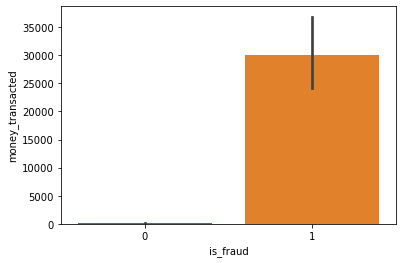

AxesSubplot(0.125,0.125;0.775x0.755)
Total number of fraud 154


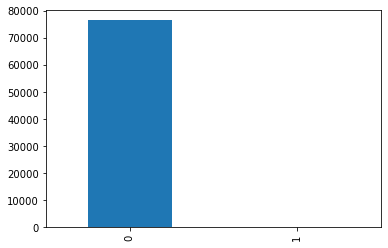

In [8]:
sns.barplot(x='is_fraud', y="money_transacted", data=df, estimator=np.mean)
sns.color_palette("Set2")
plt.show()

df.groupby('is_fraud').mean()

print(df['is_fraud'].value_counts().plot(kind='bar'))
# heavily imbalaned class . how to deal with it?

a = df['is_fraud'].sum()
print('Total number of fraud', a)
plt.show()

Text(0.5, 1.0, 'Money_transacted vs. fraud')

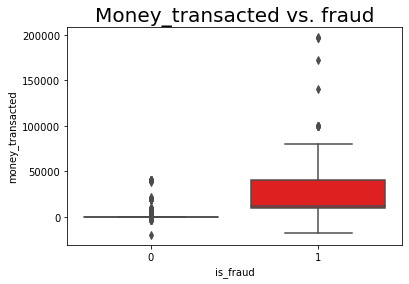

In [9]:
sns.boxplot(
    data=df,
    x='is_fraud',
    y='money_transacted',
    color='red')
plt.title("Money_transacted vs. fraud", size=20)

In [10]:
df['Hours'] = pd.DatetimeIndex(df['transaction_initiation']).hour
df['day'] = pd.DatetimeIndex(df['transaction_initiation']).day
df['Hours'] = df['Hours'].astype('object')
df['day'] = df['day'].astype('object')

## Money transacted - distribution , credited, debited

AxesSubplot(0.125,0.125;0.775x0.755)


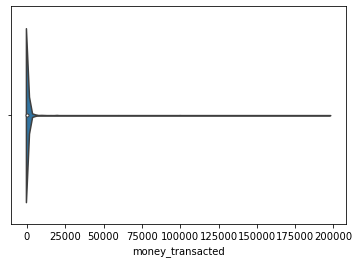

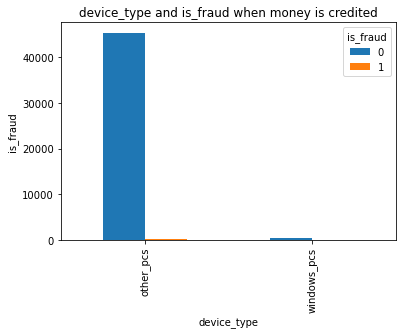

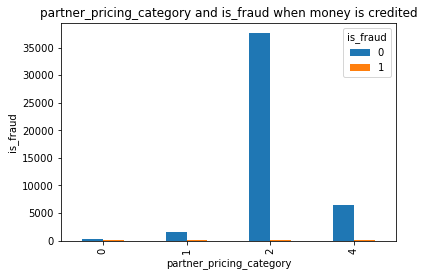

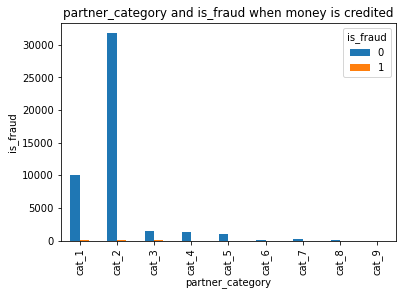

In [11]:
df_positive = df[df.money_transacted >= 0]

print(sns.violinplot(df_positive.money_transacted))


pd.crosstab(df_positive.device_type,df_positive.is_fraud).plot(kind='bar')
plt.title('device_type and is_fraud when money is credited')
plt.xlabel('device_type')
plt.ylabel('is_fraud')
plt.show()

pd.crosstab(df_positive.partner_pricing_category,df_positive.is_fraud).plot(kind='bar')
plt.title('partner_pricing_category and is_fraud when money is credited')
plt.xlabel('partner_pricing_category')
plt.ylabel('is_fraud')
plt.show()

pd.crosstab(df_positive.partner_category,df_positive.is_fraud).plot(kind='bar')
plt.title('partner_category and is_fraud when money is credited')
plt.xlabel('partner_category')
plt.ylabel('is_fraud')
plt.show()




AxesSubplot(0.125,0.125;0.775x0.755)


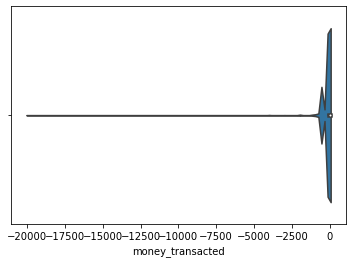

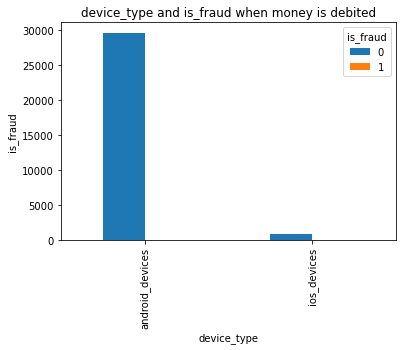

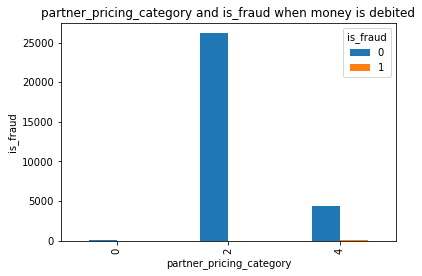

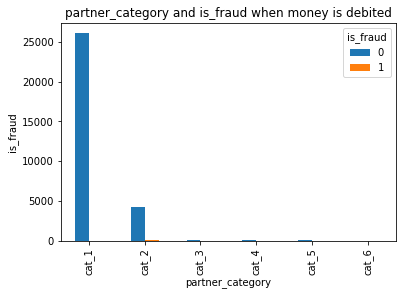

In [12]:
df_negative = df[df.money_transacted <= 0]

print(sns.violinplot(df_negative.money_transacted))


pd.crosstab(df_negative.device_type,df_negative.is_fraud).plot(kind='bar')
plt.title('device_type and is_fraud when money is debited')
plt.xlabel('device_type')
plt.ylabel('is_fraud')
plt.show()

pd.crosstab(df_negative.partner_pricing_category,df_negative.is_fraud).plot(kind='bar')
plt.title('partner_pricing_category and is_fraud when money is debited')
plt.xlabel('partner_pricing_category')
plt.ylabel('is_fraud')
plt.show()

pd.crosstab(df_negative.partner_category,df_negative.is_fraud).plot(kind='bar')
plt.title('partner_category and is_fraud when money is debited')
plt.xlabel('partner_category')
plt.ylabel('is_fraud')
plt.show()




## Separating out numerical and categorical attributes


In [13]:
cat_attr = list(df.select_dtypes(include=['category','object']).columns)
num_attr = list(df.select_dtypes(include=['number']).columns)

print(cat_attr)
print(num_attr)

['transaction_number', 'user_id', 'payment_method', 'partner_id', 'partner_category', 'country', 'device_type', 'partner_pricing_category', 'Hours', 'day']
['money_transacted', 'is_fraud']


## Removing irrelevant columns and splitting into Train and Test


In [15]:
from sklearn.model_selection import train_test_split
df['Fraud_Label'] = ['fraud' if x == 1 else 'Not_fraud' for x in df['is_fraud']]
X = df.drop(['is_fraud','transaction_number','user_id','transaction_initiation','country','Fraud_Label'], axis=1)
y = df['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23, stratify = y)

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.997996
1    0.002004
Name: is_fraud, dtype: float64
0    0.997962
1    0.002038
Name: is_fraud, dtype: float64


## Separating out numerical and categorical attributes


In [16]:
cat_attr = list(X_train.select_dtypes(include=['category','object']).columns)
num_attr = list(X_train.select_dtypes(include=['number']).columns)

print(cat_attr)
print(num_attr)

['payment_method', 'partner_id', 'partner_category', 'device_type', 'partner_pricing_category', 'Hours', 'day']
['money_transacted']


## OHE & Standard scaling

In [17]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
ohe = OneHotEncoder(handle_unknown='error')

ohe.fit(X_train[cat_attr])

columns_ohe = list(ohe.get_feature_names(cat_attr))
print(columns_ohe)

X_train_cat = ohe.transform(X_train[cat_attr])
X_test_cat = ohe.transform(X_test[cat_attr])

X_train_cat = pd.DataFrame(X_train_cat.todense(), columns=columns_ohe)
X_test_cat = pd.DataFrame(X_test_cat.todense(), columns=columns_ohe)

['payment_method_e_wallet_payments', 'payment_method_other_debit_cards', 'payment_method_sbi_atm_cum_debit_card', 'payment_method_unified_payments_interface', 'payment_method_visa_master_credit_cards', 'payment_method_visa_master_debit_cards', 'partner_id_7889', 'partner_id_15778', 'partner_id_23667', 'partner_id_31556', 'partner_id_39445', 'partner_id_47334', 'partner_id_55223', 'partner_id_63112', 'partner_id_71001', 'partner_id_78890', 'partner_id_86779', 'partner_id_94668', 'partner_id_102557', 'partner_id_110446', 'partner_id_118335', 'partner_id_126224', 'partner_id_149891', 'partner_id_157780', 'partner_id_165669', 'partner_id_173558', 'partner_id_181447', 'partner_id_189336', 'partner_id_213003', 'partner_category_cat_1', 'partner_category_cat_2', 'partner_category_cat_3', 'partner_category_cat_4', 'partner_category_cat_5', 'partner_category_cat_6', 'partner_category_cat_7', 'partner_category_cat_8', 'partner_category_cat_9', 'device_type_android_devices', 'device_type_ios_devi

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[num_attr])

X_train_std = pd.DataFrame(scaler.transform(X_train[num_attr]), columns=num_attr)
X_test_std = pd.DataFrame(scaler.transform(X_test[num_attr]), columns=num_attr)

In [19]:
X_train_preprocessed = pd.concat([X_train_std, X_train_cat], axis=1)
X_test_preprocessed = pd.concat([X_test_std, X_test_cat], axis=1)
X_train_preprocessed.head()

,money_transacted,payment_method_e_wallet_payments,payment_method_other_debit_cards,payment_method_sbi_atm_cum_debit_card,payment_method_unified_payments_interface,payment_method_visa_master_credit_cards,payment_method_visa_master_debit_cards,partner_id_7889,partner_id_15778,partner_id_23667,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,-0.048376,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.046175,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.057009,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.163481,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.041799,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## LOGISTIC REGRESSION

In [24]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()

lg.fit(X_train_preprocessed,y_train)

y_train_pred = lg.predict(X_train_preprocessed)
y_test_pred = lg.predict(X_test_preprocessed)


print(y_train_pred)
print(y_test_pred)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19094
           1       0.69      0.23      0.35        39

    accuracy                           1.00     19133
   macro avg       0.85      0.62      0.67     19133
weighted avg       1.00      1.00      1.00     19133



## RandomForestClassifier 

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)
rf_model.fit(X_train_preprocessed, y_train)

y_train_pred = rf_model.predict(X_test_preprocessed)
y_test_pred = rf_model.predict(X_test_preprocessed)
print(y_train_pred)
print(y_test_pred)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_test_pred)
print(confusion_matrix)
print("Classification Report for random: \n", classification_report(y_test, y_test_pred))

[[19094     0]
 [   39     0]]
Classification Report for random: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19094
           1       0.00      0.00      0.00        39

    accuracy                           1.00     19133
   macro avg       0.50      0.50      0.50     19133
weighted avg       1.00      1.00      1.00     19133



C:\Users\soumya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
